# Assignment - 32: In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

In [1]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
def parser(x):
    return pd.datetime.strptime('190'+x, "%Y-%m")

In [3]:
#Read the data into series dataframe. 
series = pd.read_csv('shampoo-sales.csv',sep=';', header=None)

In [4]:
series.head(5)

,0,1
0,Month,Sales of shampoo over a three year period
1,1-01,266.0
2,1-02,145.9
3,1-03,183.1
4,1-04,119.3


In [5]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
0    38 non-null object
1    37 non-null object
dtypes: object(2)
memory usage: 688.0+ bytes


In [6]:
series.describe()

,0,1
count,38,37
unique,38,37
top,3-03,439.3
freq,1,1


In [7]:
series.dropna(inplace=True)

In [8]:
series.dtypes

0    object
1    object
dtype: object

In [9]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 2 columns):
0    37 non-null object
1    37 non-null object
dtypes: object(2)
memory usage: 888.0+ bytes


In [10]:
col =series.iloc[0]
col

0                                        Month
1    Sales of shampoo over a three year period
Name: 0, dtype: object

In [11]:
series = series.rename(columns=col)

In [12]:
series = series[1: ]

In [13]:
series['Month'] = series['Month'].apply(lambda x: parser(x))

In [14]:
series.head(5)

,Month,Sales of shampoo over a three year period
1,1901-01-01,266.0
2,1901-02-01,145.9
3,1901-03-01,183.1
4,1901-04-01,119.3
5,1901-05-01,180.3


In [15]:
series['Month'] = pd.to_datetime(series['Month'])

In [16]:
series.set_index('Month', inplace=True)

In [17]:
series['Sales of shampoo over a three year period'] =series['Sales of shampoo over a three year period'].astype(float)

In [18]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
Sales of shampoo over a three year period    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


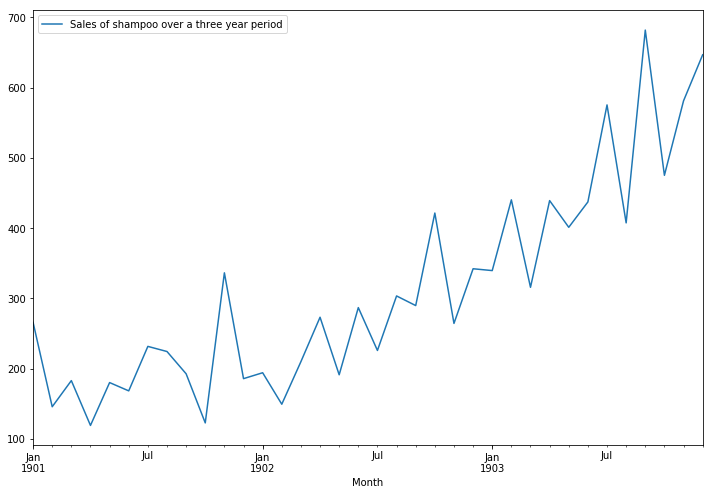

In [19]:
series.plot(figsize=(12,8))

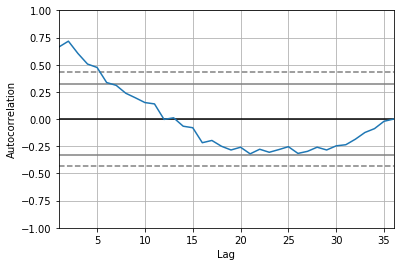

In [20]:
from pandas.plotting import autocorrelation_plot

# Create an autocorrelation plot. 
autocorrelation_plot(series)
plt.show()

In [21]:
import statsmodels.api as sm

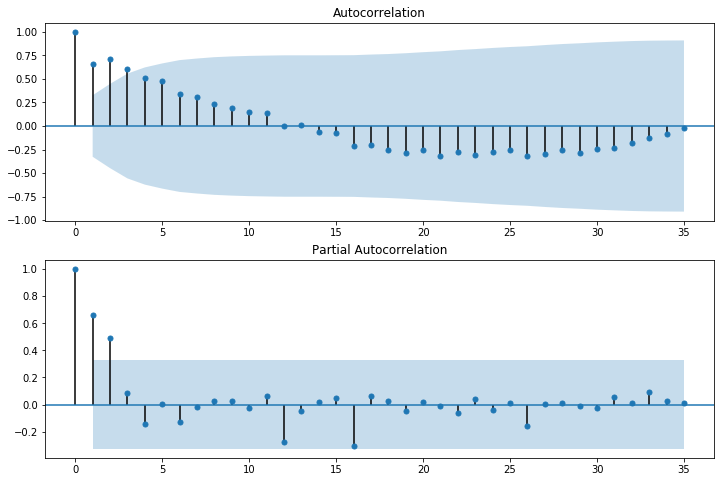

In [22]:

# Create ACF (Auto correlation) and PACF (partial Auto correlation) plots. 
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, method='ywmle', ax=ax2)

In [23]:
model = ARIMA(series, order=(5,1,0),freq='MS')
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\shrqfrhn\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Tue, 12 Feb 2019   AIC                            406.340
Time:                                                 11:07:06   BIC                            417.227
Sample:                                             02-01-1901   HQIC                           410.098
                                                  - 12-01-1903                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

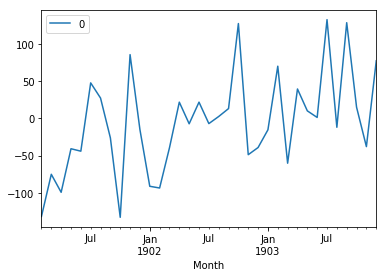

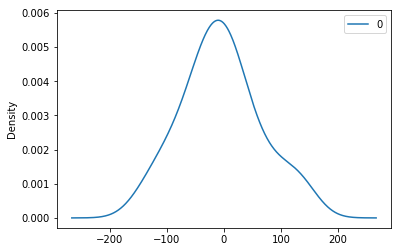

                0
count   35.000000
mean    -5.495295
std     68.132877
min   -133.296686
25%    -42.477964
50%     -7.186673
75%     24.748258
max    133.237889


In [24]:

# Plot the residuals of the model. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [25]:
# Test the model with train and test data 
size=int(len(series)*0.7)
train, test = series.values[0:size], series.values[size:len(series)]
len(train), len(test)

(25, 11)

In [26]:
# Create train list and empty list to store the predictions 
X=list(train)
predictions=[]

In [27]:
for t in range (len(test)):
    model = ARIMA(X, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    X.append(test[t])
    print('predicted=%f, expected=%f' % (yhat, test[t]))

predicted=387.376423, expected=440.400000
predicted=348.154259, expected=315.900000
predicted=386.308819, expected=439.300000
predicted=356.082056, expected=401.300000
predicted=446.379526, expected=437.400000
predicted=394.737264, expected=575.500000
predicted=434.915601, expected=407.600000
predicted=507.923413, expected=682.000000
predicted=435.482930, expected=475.300000
predicted=652.743793, expected=581.300000
predicted=546.343499, expected=646.900000


In [28]:
# Print the Mean squared error. 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 8119.126


In [29]:
# Print Root mean squared error.
print('Test RMSE: %.3f' % math.sqrt(error))

Test RMSE: 90.106


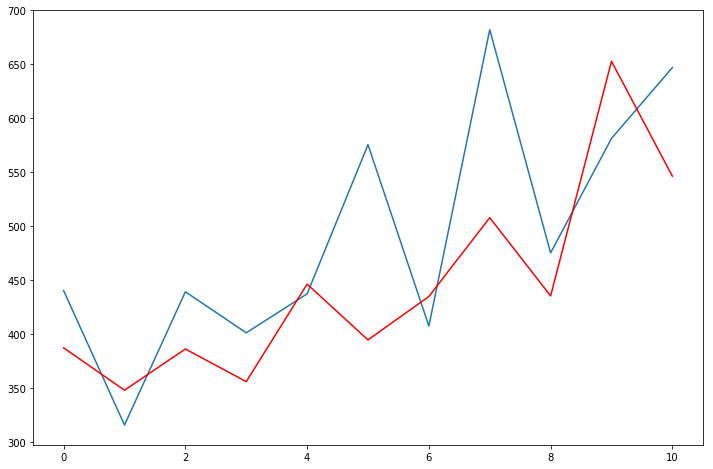

In [30]:
plt.figure(figsize=(12,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()